Hyperparameter optimization for Transformer-based NLP topic modeling using the Python package BERTopic

# Resources

- [Blog post](https://medium.com/@AmyGrabNGoInfo/hyperparameter-tuning-for-bertopic-model-in-python-104445778347) for this tutorial
- Video version of the tutorial on [YouTube](https://www.youtube.com/watch?v=PbX4nHEOe0o&list=PLVppujud2yJpx5r8GFeJ81fyek8dEDMX-&index=5)
- More video tutorials on [NLP](https://www.youtube.com/playlist?list=PLVppujud2yJpx5r8GFeJ81fyek8dEDMX-)
- More blog posts on [NLP](https://medium.com/@AmyGrabNGoInfo/list/nlp-49340193610f)


For more information about data science and machine learning, please check out my [YouTube channel](https://www.youtube.com/channel/UCmbA7XB6Wb7bLwJw9ARPcYg), [Medium Page](https://medium.com/@AmyGrabNGoInfo) and [GrabNGoInfo.com](https://grabngoinfo.com/tutorials/), or follow GrabNGoInfo on [LinkedIn](https://www.linkedin.com/company/grabngoinfo/).

# Intro

Hyperparameter tuning is an important optimization step for building a good topic model. BERTopic is a topic modeling python library that combines transformer embeddings and clustering model algorithms to identify topics in NLP (Natual Language Processing). In this tutorial, we will talk about:
* What are the hyperparameters for the BERTopic model?
* How to tune the hyperparameters for the topic model?
* How to compare the results with different hyperparameter values?

Please check out my previous tutorial [Topic Modeling with Deep Learning Using Python BERTopic](https://medium.com/grabngoinfo/topic-modeling-with-deep-learning-using-python-bertopic-cf91f5676504) for an introduction to BERTopic.

Let's get started!

# Step 1: Install And Import Python Libraries

In [ ]:
# Install bertopic
!pip install bertopic flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.9/401.9 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 45.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.8 MB/s eta 0:00:00
  

In [ ]:
!pip install importlib-metadata>=4.8.0

After the installation, when we tried to import the `BERTopic` method, a type error about an unexpected keyword argument `cachedir` came up.

This `TypeError` is caused by the incompatibility between `joblib` and `HDBSCAN`. At the time this tutorial was created, `joblib` has a new release that is not supported by `HDBSCAN`. HDBSCAN does have a fix for it but has not been rolled out. So if you are watching this tutorial on YouTube or reading this tutorial on Medium.com at a later time, you may not encounter this error message.

In [ ]:
# # Try to import BERTopic
# from bertopic import BERTopic

Before the incompatibility issue between `joblib` and `HDBSCAN` is fixed, we can solve this issue by installing an old version of `joblib`. In this example, we used `joblib` version 1.1.0. After installing `joblib`, we need to restart the runtime.

In [ ]:
# Install older version of joblib
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 10.5 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


After installing the python packages, we will import the python libraries.
* `pandas` and `numpy` are imported for data processing.
* `UMAP` and `PCA` are for dimension reduction.
* `HDBSCAN` and `KMeans` are for clustering models.
* `CountVectorizer` is for term vectorization.
* `sentence_transformers` and `flair` are for pretrained document embeddings.
* `BERTopic` is for the topic modeling.


In [ ]:
# Data processing
import pandas as pd
import numpy as np

# Dimension reduction
from umap import UMAP
from sklearn.decomposition import PCA

# Clustering
from hdbscan import HDBSCAN
from sklearn.cluster import KMeans

# Count vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Sentence transformer
from sentence_transformers import SentenceTransformer

# Flair
from transformers.pipelines import pipeline
from flair.embeddings import TransformerDocumentEmbeddings, WordEmbeddings, DocumentPoolEmbeddings, StackedEmbeddings

# Topic model
from bertopic import BERTopic

In [ ]:
# Read in data
df = pd.read_csv('/content/data.csv')


# Take a look at the data
df.head()

,article_id,link,content,title,month,year
0,1,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: The last time Laxmi Chandra came to...,Revamped Central Vista opens to the public | D...,9,2022
1,2,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: Delhi Traffic Police has made elabo...,Central Vista Avenue: Pick your route carefull...,9,2022
2,3,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: Delhi Metro Rail Corporation (DMRC)...,Free Delhi Metro e-bus service to Central Vist...,9,2022
3,4,https://timesofindia.indiatimes.com/city/pune/...,PUNE: The Vista Dome coaches on Central Railwa...,Vistadome coaches in all Central Railway train...,10,2022
4,5,https://timesofindia.indiatimes.com/city/chand...,CHANDIGARH: Taking strong note of delay in con...,Railway yard officials pulled up for delay in ...,11,2022


`.info` helps us to get information about the dataset. 

From the output, we can see that this data set has 1000 records and no missing data. The `review` column is the `object` type.

In [ ]:
# Get the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  1158 non-null   int64 
 1   link        1158 non-null   object
 2   content     1158 non-null   object
 3   title       1158 non-null   object
 4   month       1158 non-null   int64 
 5   year        1158 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 54.4+ KB


In [ ]:
df

,article_id,link,content,title,month,year
0,1,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: The last time Laxmi Chandra came to...,Revamped Central Vista opens to the public | D...,9,2022
1,2,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: Delhi Traffic Police has made elabo...,Central Vista Avenue: Pick your route carefull...,9,2022
2,3,https://timesofindia.indiatimes.com/city/delhi...,NEW DELHI: Delhi Metro Rail Corporation (DMRC)...,Free Delhi Metro e-bus service to Central Vist...,9,2022
3,4,https://timesofindia.indiatimes.com/city/pune/...,PUNE: The Vista Dome coaches on Central Railwa...,Vistadome coaches in all Central Railway train...,10,2022
4,5,https://timesofindia.indiatimes.com/city/chand...,CHANDIGARH: Taking strong note of delay in con...,Railway yard officials pulled up for delay in ...,11,2022
...,...,...,...,...,...,...
1153,1306,https://www.business-standard.com/article/curr...,"The revamped lawns of Rajpath and India Gate, ...","Central Vista project: Rajpath, India Gate to ...",6,2022
1154,1307,https://www.business-standard.com/article/curr...,The redevelopment project of the Central Vista...,Central Vista Avenue project to be completed i...,6,2022
1155,1308,https://www.business-standard.com/article/curr...,A fire broke out on Monday in three temporary ...,Fire in shelters for workers near Parliament H...,6,2022
1156,1309,https://www.business-standard.com/article/curr...,Ahluwalia Contracts India Limited on Tuesday e...,Central Vista: Ahluwalia Contracts lowest bidd...,3,2022


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=7202318c0f4bcfaf76c1ae73a8f3e55235d75e48663371366502e40f90b3377b
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=9d2d539030041ea20f266e7552e7220f2cfebc7c7d23427709bbbb4f146898cd
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
!pip install sacremoses


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=7e72f2e9fce33ba96faab986ca259ed9a5858c1c99c03dc25b046b229ae30c7e
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import spacy
import nltk
import re
import string
import pandas as pd
import numpy as np
from stop_word_list import *
import gensim
from gensim import corpora
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
# from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
    
%matplotlib inline

%run utils_nlp.ipynb


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:
df= df.dropna(axis=0, subset=['content'])



In [ ]:
df['processed_text'] = df['content'].apply(process_text)
clean_text= pd.DataFrame(df.processed_text)
clean_text

,processed_text
0,"[new, delhi, last, time, laxmi, chandra, came,..."
1,"[new, delhi, delhi, traffic, police, made, ela..."
2,"[new, delhi, delhi, metro, rail, corporation, ..."
3,"[pune, vista, dome, coach, central, railway, r..."
4,"[chandigarh, taking, strong, note, delay, cond..."
...,...
1153,"[revamped, lawn, rajpath, india, gate, known, ..."
1154,"[redevelopment, project, central, vista, avenu..."
1155,"[fire, broke, monday, three, temporary, shelte..."
1156,"[ahluwalia, contract, india, limited, tuesday,..."


In [ ]:
data = list(df.content)
data[:2]

['NEW DELHI: The last time Laxmi Chandra came to the India Gate area, the boulevard there was called Rajpath.\nOn Friday, when she came there with her family after two years, Kartavya Path mesmerised her.  “It is amazing to see the redeveloped Central Vista. When we came earlier, there was a lot of dust. Now, the sandy area has now been covered with grasses,"\x9d said Chandra, whose daughter was busy clicking pictures of the newly installed statue of Subhas Chandra Bose.\n\nAfter Kartavya Path was inaugurated on Thursday after 19 months of closure to the public, people made a beeline for the revamped spot. Though police said 5,000-7,000 people visited Kartavya Path on Friday, the number of visitors is expected to go up substantially over the weekend.\nPowered By\nVideo Player is loading.\nGujarat, Himachal Election Results 2022 Live Updates: Party\'s high command to decide on Himachal CM, say Congress MLAs\n200 MORE UPDATES\nGUJARATHIMACHAL PRADESH\nPrevious\nSEATS: 182/182\nMAJORITY 9

In [ ]:
# Build the bigram and trigrams
bigram = gensim.models.Phrases(data, min_count=20, threshold=100) 
trigram = gensim.models.Phrases(bigram[data], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [ ]:
mt = MosesDetokenizer(lang='en')

In [ ]:
df['token']=df['processed_text'].apply(lambda x: mt.detokenize(x, return_str=True))


In [ ]:
df['token']=df['token'].apply(remove_stop_token) # remove stop words again
df['token']

0       [new, delhi, time, laxmi, chandra, came, india...
1       [new, delhi, delhi, traffic, police, elaborate...
2       [new, delhi, delhi, metro, rail, corporation, ...
3       [pune, vista, dome, coach, central, railway, r...
4       [chandigarh, taking, strong, note, delay, cond...
                              ...                        
1153    [revamped, lawn, rajpath, india, gate, known, ...
1154    [redevelopment, project, central, vista, avenu...
1155    [broke, monday, temporary, shelter, worker, en...
1156    [ahluwalia, contract, india, limited, tuesday,...
1157    [new, loop, corridor, spanning, proposed, hear...
Name: token, Length: 1158, dtype: object

In [ ]:
df['detoken']=df['token'].apply(lambda x: mt.detokenize(x, return_str=True))


In [ ]:
df['detoken']

0       new delhi time laxmi chandra came india gate a...
1       new delhi delhi traffic police elaborate arran...
2       new delhi delhi metro rail corporation dmrc pr...
3       pune vista dome coach central railway received...
4       chandigarh taking strong note delay conducting...
                              ...                        
1153    revamped lawn rajpath india gate known central...
1154    redevelopment project central vista avenue str...
1155    broke monday temporary shelter worker engaged ...
1156    ahluwalia contract india limited tuesday emerg...
1157    new loop corridor spanning proposed heart nati...
Name: detoken, Length: 1158, dtype: object

In [ ]:
df['content']

0       NEW DELHI: The last time Laxmi Chandra came to...
1       NEW DELHI: Delhi Traffic Police has made elabo...
2       NEW DELHI: Delhi Metro Rail Corporation (DMRC)...
3       PUNE: The Vista Dome coaches on Central Railwa...
4       CHANDIGARH: Taking strong note of delay in con...
                              ...                        
1153    The revamped lawns of Rajpath and India Gate, ...
1154    The redevelopment project of the Central Vista...
1155    A fire broke out on Monday in three temporary ...
1156    Ahluwalia Contracts India Limited on Tuesday e...
1157    A new loop corridor, spanning about 3 km, has ...
Name: content, Length: 1158, dtype: object

# Step 3: Hyperparameters for Dimensionality Reduction

In step 3, we will talk about the hyperparameters for dimensionality reduction in BERTopic.

Dimensionality reduction is necessary because the clustering model works better for low-dimension data than high-dimension data. The document embeddings usually have hundreds of dimensions, so we need to reduce the dimensionality before passing the embeddings to a clustering model.

The default algorithm for dimension reduction is UMAP (Uniform Manifold Approximation & Projection). Compared with other dimension reduction techniques such as PCA (Principle Component Analysis), UMAP maintains the data's local and global structure when reducing the dimensionality, which is important for representing the semantics of the text data. The UMAP model accepts customized hyperparameters.

* `n_neighbors` is the local neighborhood size for UMAP. This is the parameter that controls the local versus global structure in data. 
 * A low value forces UMAP to focus more on the local structure and may lose insights into the big picture.
 * A high value pushes UMAP to look at the broader neighborhoods and may lose details on local structure. This usually results in a larger cluster size.
 * The default `n_neighbors` value for UMAP is 15.
* `n_components` indicates the output dimension for UMAP. This is the dimension of data that will be passed into the clustering model.
* `min_dist` controls how tightly UMAP is allowed to pack points together. It is the minimum distance between points in the low-dimensional space.
 * Small values of `min_dist` result in clumpier embeddings, which is good for clustering. Since our goal of dimension reduction is to build clustering models, we set `min_dist` to 0.
 * Large values of `min_dist` prevent UMAP from packing points together and preserves the broad structure of data.
* `metric='cosine'` indicates that we will use cosine to measure the distance.
* `random_state` sets a random seed to make the UMAP results reproducible.
 * BERTopic model by default produces different results each time because of the stochasticity inherited from UMAP.
 * To get reproducible topics, we need to pass a value to the `random_state` parameter in the `UMAP` method.

After initiating the UMAP model with the hyperparameters, we pass it to the BERTopic model, and run the model using the review data. 

Using `get_topic_info()`, we can see the topic model results.

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,0,1126,0_central_project_new_vista
1,1,32,1_tree_transplanted_central_forest


Using the attribute `get_topic_info()` on the topic model gives us a list of topics. We can see that the output gives us 25 rows in total.

* Topic -1 should be ignored. It indicates that the reviews are not assigned to any specific topic. The count for topic -1 is 277, meaning that there are 277 outlier reviews that do not belong to any topic.
* Topic 0 to topic 23 are the 24 topics created for the reviews. It was ordered by the number of reviews in each topic, so topic 0 has the highest number of reviews.
* The Name column lists the top terms for each topic. For example, the top 4 terms for Topic 0 are `sound`, `hear`, `quality`, and `the`, indicating that it is a topic related to sound quality.

BERTopic provides the option of using other dimensionality reduction techniques by changing the `umap_model` value in the `BERTopic` method. 

For example, we can use the widely used dimension reduction algorithm PCA to replace UMAP. 

In [ ]:
# PCA for dimensionality reduction
pca_model = PCA(n_components=15)

# Initiate BERTopic
topic_model = BERTopic(umap_model=pca_model)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,773,-1_central_project_new_vista
1,0,211,0_building_new_central_parliament
2,1,134,1_court_project_central_vista
3,2,29,2_central_gandhi_project_congress
4,3,11,3_tree_site_forest_transplantation


The output shows that 5 topics are created, which is much less than the 24 topics using UMAP.

# Step 4: Hyperparameters for Clustering Model

In step 4, we will talk about the hyperparameters for the clustering model in BERTopic.

After the text documents have been transformed into embeddings, and the embeddings' dimensionality has been reduced, the next step is to run a clustering model on the embedded documents. 

The default algorithm for clustering is HDBSCAN. HDBSCAN is a density-based clustering model. It identifies the number of clusters automatically and does not require specifying the number of clusters beforehand like most of the clustering models.

HDBSCAN has a few important hyperparameters.
* `min_cluster_size` is the minimum number of documents in each cluster. 
 * A larger minimum cluster size results in bigger clusters and fewer total clusters.
 * A smaller minimum cluster size results in smaller clusters and a larger number of total clusters.
 * A rule of thumb is to increase this threshold for a large dataset and keep it at the default value of 10 for a small dataset.

* `min_samples` controls the number of outliers. It defaults to the same value as `min_cluster_size`. Reducing the value helps to reduce the noise in the topics.

* `metric` indicates the distance metric used for the clustering model such as `euclidean`.

* `prediction_data` is for new documents topic predictions. We need to set it to `False` if there is no need for new document prediction.  

After specifying the hyperparameters for the HDBSCAN model, we pass the model into the BERTopic method. Notice that when initiating the BERTopic model, the `umap_model` from the previous step is passed in as well. This is because we would like to utilize the same random seed defined in the UMAP model to make the results comparable. We will include `umap_model` for all the topic models going forward.

In [ ]:
# Clustering model
hdbscan_model = HDBSCAN(min_cluster_size=10, min_samples = 10, metric='euclidean', prediction_data=True)

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,0,1126,0_central_project_new_vista
1,1,32,1_tree_transplanted_central_forest


Besides the HDBSCAN clustering model, BERTopic supports other clustering algorithms. 

There are two major differences between HDBSCAN and other clustering algorithms such as K-Means and GMM (Gaussian Mixture Model).

* HDBSCAN creates a separate cluster for outliers, but most other algorithms do not, so the clusters may contain more noise than HDBSCAN clusters. 
* HDBSCAN automatically decides the number of clusters, while most other clustering algorithms need to have the number of clusters as input. 

To learn more about the clustering model, please check out my previous tutorials [5 Ways for Deciding Number of Clusters](https://medium.com/grabngoinfo/5-ways-for-deciding-number-of-clusters-in-a-clustering-model-5db993ea5e09) and [4 Clustering Model Algorithms in Python](https://medium.com/grabngoinfo/4-clustering-model-algorithms-in-python-and-which-is-the-best-7f3431a6e624).

We provide the sample code to implement a K-Means clustering model with BERTopic, and other clustering model algorithms can follow the same process.
* Firstly, the K-Means model is initiated with the number of clusters.
* Then the initiated K-Means model is passed into the `hdbscan_model` parameter in the `BERTopic` function.
* After that, the BERTopic model is fit and we get a list of 15 topics.

In [ ]:
# Clustering model
kmeans_model = KMeans(n_clusters=15)

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, hdbscan_model=kmeans_model)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,0,139,0_court_project_justice_change
1,1,118,1_building_central_new_project
2,2,116,2_kartavya_path_india_gate
3,3,112,3_congress_project_central_government
4,4,111,4_building_parliament_new_project
5,5,82,5_modi_new_parliament_building
6,6,80,6_avenue_day_rajpath_central
7,7,77,7_court_petitioner_project_high
8,8,75,8_project_building_government_new
9,9,64,9_land_central_use_delhi


# Step 5: Hyperparameter Tuning for Language Embeddings

In step 5, we will talk about how to tune the language embeddings.

Embeddings are the vector representation of the documents. BERTopic uses the English version of the Sentence Transformer by default to get document embeddings. 

If there are multiple languages in the document, we can use `BERTopic(language="multilingual")` to support the topic modeling of over 50 languages.

In [ ]:
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="multilingual")

On the backend, the `language` parameter in the `BERTopic` method uses the sentence-transformer model.

* When `language="english"`, the sentence-transformer model `all-MiniLM-L6-v2` is used.

* When `language="multilingual"`, the sentence-transformer model `paraphrase-multilingual-MiniLM-L12-v2` is used.

Sentence-transformer has different models with different sizes, speeds, and performances. We can go to the [sentence transformer website](https://www.sbert.net/docs/pretrained_models.html) for the latest list of pretrained models.

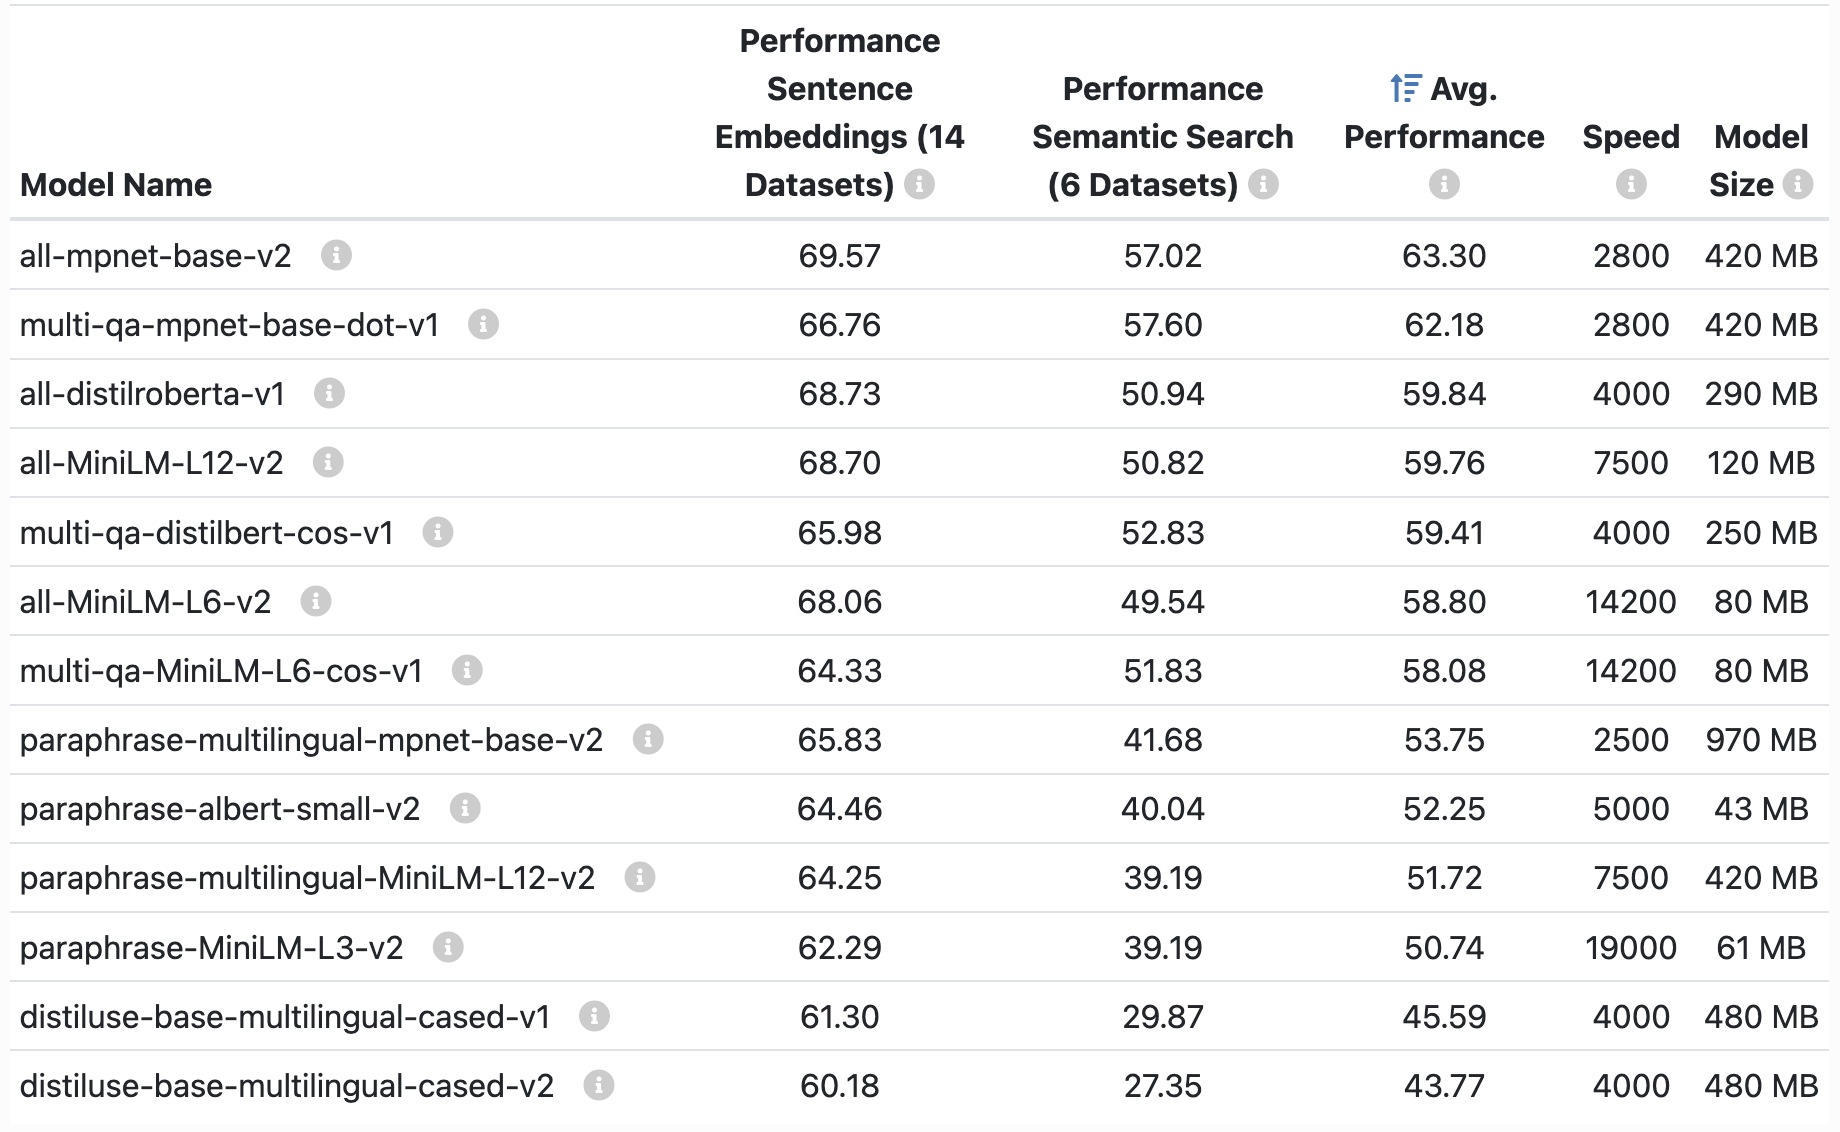

We can select any model from sentence transformers and pass it through BERTopic with the `embedding_model` parameter. 

For example, to use the sentence transformer model `paraphrase-albert-small-v2`, we can pass it on to the `SentenceTransformer`, and set it as the `embedding_model`.

In [ ]:
# Initiate a sentence transformer model
sentence_model = SentenceTransformer("all-mpnet-base-v2")

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, embedding_model=sentence_model)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,266,-1_building_central_new_project
1,0,121,0_court_change_bench_justice
2,1,93,1_congress_government_gandhi_covid
3,2,80,2_court_petitioner_high_project
4,3,55,3_building_museum_city_national
5,4,51,4_parliament_building_new_sabha
6,5,50,5_enclave_cpwd_bid_limited
7,6,33,6_tree_forest_transplanted_cpwd
8,7,32,7_road_traffic_marg_hexagon
9,8,31,8_committee_project_environment_building


The output gives us 21 topics, and the topics look similar to the topics from the default parameters.

Besides the sentence-transformer models, BERTopic 

1.   List item
2.   List item

supports the pre-trained models from other python packages such as hugging face and flair.

[Hugging Face model hub](https://huggingface.co/models) has thousands of pre-trained models. In this example, we used an English model called `distilroberta-base`, loaded it in a Hugging Face pipeline, and pass the pipeline to the parameter `embedding_model`.

In [ ]:
# Initiate a pretrained model
hf_model = pipeline("feature-extraction", model="distilroberta-base")

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, embedding_model=hf_model)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()


Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,Topic,Count,Name
0,-1,280,-1_central_project_new_vista
1,0,152,0_building_india_new_modi
2,1,150,1_central_project_vista_new
3,2,121,2_central_building_new_parliament
4,3,73,3_gate_lawn_path_india
5,4,61,4_court_project_bench_petitioner
6,5,60,5_court_project_delhi_petition
7,6,48,6_rajpath_avenue_central_vista
8,7,36,7_redevelopment_central_new_vista
9,8,31,8_building_parliament_new_sabha


We can see that two topics are created, and the terms are not very meaningful, indicating that `distilroberta-base` is not a good choice for our review corpus.

Flair is an NLP (Natual Language Processing) library that allows us to choose almost any embedding models, or combine a few embedding models together. 

To use a single embedding model with Flair, we can pass the model name to `TransformerDocumentEmbeddings`, and use it as the input for the `embedding_model` option in `BERTopic`.

In [ ]:
# Initiate a pretrained embedding model
roberta_model = TransformerDocumentEmbeddings('roberta-base')

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, embedding_model=roberta_model)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,385,-1_building_central_project_new
1,0,85,0_central_vista_project_delhi
2,1,77,1_congress_government_gandhi_project
3,2,71,2_avenue_minister_central_puri
4,3,64,3_path_kartavya_india_rajpath
5,4,55,4_public_building_government_city
6,5,50,5_court_petitioner_project_high
7,6,48,6_tree_cpwd_proposal_environment
8,7,37,7_building_office_ministry_central
9,8,30,8_parliament_building_new_sabha


We can see that two topics are created, and all the terms are stopwords without much meaning, indicating that this is not a good embedding model choice for our review corpus.

To use multiple embedding models with Flair, we first need to initiate different pretrained embedding models, then use the `StackedEmbeddings` function to stack the models, and finally pass the stacked embeddings to the `BERTopic` `embedding_model` parameter.

In [ ]:
# Initiate a pretrained embedding model
roberta_model = TransformerDocumentEmbeddings('roberta-base')

# Initiate another pretrained embedding model
glove_embedding = WordEmbeddings('crawl')
document_glove_embeddings = DocumentPoolEmbeddings([glove_embedding])

# Stack the two pretrained embedding models
stacked_embeddings = StackedEmbeddings(embeddings=[roberta_model, document_glove_embeddings])

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, embedding_model=stacked_embeddings)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()


2023-02-04 14:49:24,188 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmpfisc53kx


100%|██████████| 1200000128/1200000128 [01:08<00:00, 17448206.00B/s]

2023-02-04 14:50:33,518 copying /tmp/tmpfisc53kx to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M.vectors.npy


2023-02-04 14:50:38,544 removing temp file /tmp/tmpfisc53kx
2023-02-04 14:50:39,445 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M not found in cache, downloading to /tmp/tmpwhjdufft


100%|██████████| 39323680/39323680 [00:03<00:00, 12456177.19B/s]

2023-02-04 14:50:43,166 copying /tmp/tmpwhjdufft to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M
2023-02-04 14:50:43,220 removing temp file /tmp/tmpwhjdufft



/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


,Topic,Count,Name
0,-1,246,-1_central_new_vista_project
1,0,272,0_government_project_new_central
2,1,109,1_court_change_project_bench
3,2,70,2_court_petitioner_project_high
4,3,60,3_building_office_ministry_new
5,4,46,4_bid_limited_cpwd_enclave
6,5,37,5_parking_official_stretch_allowed
7,6,34,6_tree_transplanted_forest_cpwd
8,7,34,7_building_parliament_new_sabha
9,8,29,8_new_minister_redevelopment_parliament


We can see that 14 topics are created. The results look better than just using one model, but still not as good as the sentence transformer embedding models. 

# Step 6: Hyperparameter Tuning for Number of Topics

In step 6, we will talk about how to change the number of topics for the topic model.

BERTopic uses the number of clusters created by the HDBSCAN model as the number of topics by default, but we can reduce the number of topics by changing the value of the `nr_topics` parameter.

* `nr_topics=None` indicates that there is no topic reduction.
* `nr_topics=auto` indicates an automatic topic reduction of the HDBSCAN results by merging topics close to each other.
* `nr_topics=15` indicates that the target number of topics is 15.
* `nr_topics` value should always be smaller than the number of topics created by `nr_topics=None`.

On the backend, the topic reduction process is executed by merging similar topics based on the feature vector from c-TF-IDF. It starts with low-frequency topics and iteratively reduces the number of topics to the specified number.



In [ ]:
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, nr_topics=15)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,0,32,0_tree_transplanted_central_forest
1,1,1126,1_central_project_new_vista


After setting `nr_topics=15`, we can see that the BERTopic model produced 15 topics.

When the text corpus is large, training a BERTopic model can take a long time. Rerunning the model each time we change the number of topics can waste a lot of time and resources. The good news is that the BERTopic package has a `reduce_topics` method that uses the existing model information to do a topic reduction.

In [ ]:
# Further reduce topics
topic_model.reduce_topics(df['detoken'], nr_topics=2)

# Get the list of topics
topic_model.get_topic_info()

IndexError: ignored

After passing in the review corpus and the number of topics, we can see that the number of topics is reduced to the specified number of 10.

If we would like to manually pick which topics to merge together based on domain knowledge, we can list the topic numbers and pass them into the `merge_topics` function.

In this example, we merged topic 0 and topic 3 together because they both talk about headphone quality, and merged topic 2 and topic 6 together because they both talk about product satisfaction. The number of topics is reduced by two, and we have 8 topics now.

In [ ]:
topics_to_merge = [[0, 3],
                   [2, 6]]
topic_model.merge_topics(df['detoken'], topics_to_merge)

# Get the list of topics
topic_model.get_topic_info()

Another way of adjusting the number of topics is to control the minimum number of documents in a topic. We can set up this value by the parameter `min_topic_size`.
* A low value for `min_topic_size` allows fewer documents to form a topic, so the topic model produces more topics.
* A high value for `min_topic_size` requires a lot of documents to form a topic, so the topic model produces fewer topics.
* The default value for `min_topic_size` is 10. A general guideline for setting `min_topic_size` is to set up a low value for a smaller dataset, and a high value for a larger dataset.

Setting `min_topic_size` is the same as setting `min_cluster_size` in HDBSCAN.


In [ ]:
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, min_topic_size=25)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()

We can see that after setting the minimum topic size of 25, we get fewer topics, and each topic has more than 25 documents.

# Step 7: Hyperparameter for Top Words

In step 7, we will tune the hyperparameter for the top words representing the topics. The parameters that we will talk about are `n_gram_range` and `top_n_words`.
* `n_gram_range` is used to specify the range of n-grams included in the topic model.
* `top_n_words` controls how many words are used to describe the topic.

Let's take a look at `n_gram_range` first.

N-grams are a continuous sequence of words. Its value determines the words used in CountVectorizer, and the top words representing the topics.  
* Unigram refers to one word. Unigram is the default for BERTopic.
* Bigram refers to two consecutive words. For example, "ice cream" is considered as one word for bigram, but will be separated into two words, "ice" and "cream" for unigram.
* Trigram refers to three consecutive words. 
* Cardinal numbers are used for more than three consecutive words, four-gram, five-gram, for example.

`n_gram_range=(1, 3)` means that unigrams, bigrams, and trigrams are included in the model.


In [ ]:
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, n_gram_range=(1, 3))

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()

From the output, we can see that the keywords representing the topics include both single words and multi-word phrases.

Next, let's talk about `top_n_words`. `top_n_words` has the default value of 10, meaning that 10 top words will be used to represent each topic. If we change the value to 5, only the top five most representative words are included.

In [ ]:
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, top_n_words=5)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Got top topic words
topic_model.get_topic(1)

# Step 8: Hyperparameters for Words Universe

In step 8, we will talk about how to control the number of words for the topic model. Limiting the number of words helps to reduce the noise in the topics. 

There are two ways to control how many words are used in `CountVectorizer` and `c-TF-IDF`.
* `min_df` sets a threshold for the required word frequency. For example, `min_df=10` indicates that any words that appeared less than 10 times in the corpus will not be included in the c-TF-IDF calculation. A general guideline is to set a high `min_df` value for a large corpus and a low value for a small corpus.
* `max_features` indicates the maximum number of words to include for the c-TF-IDF calculation. `max_features=1_000` means that the top 1000 words with the highest frequency in the corpus will be included.

Both `min_df` and `max_features` are the hyperparameters for the `CountVectorizer`.

To use `min_df`, we set the value when initiating `CountVectorizer`, then pass it to the `vectorizer_model` argument in the `BERTopic` method.

In [ ]:
# Count vectorizer
vectorizer_model = CountVectorizer(min_df=2)

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, vectorizer_model=vectorizer_model)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()

To use `max_features`, we set the value when initiating CountVectorizer, then pass it to the vectorizer_model argument in the BERTopic method.

In [ ]:
# Count vectorizer
vectorizer_model = CountVectorizer(max_features=1_000)

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, vectorizer_model=vectorizer_model)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()

# Step 9: Hyperparameter for Diversifying Topic Representation

In step 9, we will tune the hyperparameter to achieve a more diversified topic representation.

The top n words that represent the topic may include variations of the same word or words that are synonyms. 

The hyperparameter `diversity` helps to remove the words with the same or similar meanings. It has a range of 0 to 1, where 0 means least diversity and 1 means most diversity.

In [ ]:
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, diversity=0.8)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()

After setting `diversity=0.8`, we can see that the top words describing the topics are more diversified. For example, topic 13 previously has the top words `disappointed_very_disappointment_disappointing`, and has the top words `disappointment_aggravating_youd_displeased` after diversification, which is much more diversified.

# Step 10: Hyperparameter for Stopwords

In step 10, we will talk about how to remove the stopwords from the list of the top words.

After creating the topics, if the top words representing the topics contain stopwords, we can remove the stopwords using `stop_words="english"` with `CountVectorizer`.

In [ ]:
# Count vectorizer
vectorizer_model = CountVectorizer(stop_words="english")

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, vectorizer_model=vectorizer_model)

# Run BERTopic model
topics = topic_model.fit_transform(df['detoken'])

# Get the list of topics
topic_model.get_topic_info()

We can see that after using `stop_words="english"`, all the stopwords are removed from the top keywords.

# Step 11: Hyperparameter for Topic Probability Output

In step 11, we will talk about the boolean parameter that decides whether or not to produce topic probability.

* When `calculate_probabilities = True`, the probabilities of each document belonging to each topic are calculated. The topic with the highest probability is the predicted topic for a new document. This probability represents how confident we are about finding the topic in the document.
* When `calculate_probabilities = False`, the probabilities of each document belonging to each topic are not calculated. This saves computation time and cost. If there is no new document to predict, we do not need to calculate the probabilities.

Setting the parameter `calculate_probabilities` is the same as setting the parameter `prediction_data` with HDBSCAN.

We can visualize the probabilities using `visualize_distribution`, and pass in the document index. `visualize_distribution` has the default probability threshold of 0.015, so only the topic with a probability greater than 0.015 will be included.

In [ ]:
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, calculate_probabilities=True)

# Run BERTopic model
topics, probablity = topic_model.fit_transform(df['detoken'])

# Visualize probability distribution
topic_model.visualize_distribution(topic_model.probabilities_[0], min_probability=0.015)

In [ ]:
# Check the content for the first review
df['detoken'][0]

In [ ]:
# Get probabilities for all topics
topic_model.probabilities_[0]